# Questions:

1. Women and Children First or the Wealthy First, Was wealth, gender or age a more signicant factor in survical?

2. Who was more likely die, a rich man or poor woman?

3. Where did the wealthiest embark?

## Load data

In [85]:
import pandas as pd

train = pd.read_csv('titanic_data/train.csv')
test = pd.read_csv('titanic_data/test.csv')

df = pd.concat([train, test], axis=0)

df.head(50)

PassengerId  Survived  Pclass  \
0             1       0.0       3   
1             2       1.0       1   
2             3       1.0       3   
3             4       1.0       1   
4             5       0.0       3   
5             6       0.0       3   
6             7       0.0       1   
7             8       0.0       3   
8             9       1.0       3   
9            10       1.0       2   
10           11       1.0       3   
11           12       1.0       1   
12           13       0.0       3   
13           14       0.0       3   
14           15       0.0       3   
15           16       1.0       2   
16           17       0.0       3   
17           18       1.0       2   
18           19       0.0       3   
19           20       1.0       3   
20           21       0.0       2   
21           22       1.0       2   
22           23       1.0       3   
23           24       1.0       1   
24           25       0.0       3   
25           26       1.0       3   
26           27       0.0       3   
27           28       0.0       1   
28           29       1.0       3   
29           30       0.0       3   
30           31       0.0       1   
31           32       1.0       1   
32           33       1.0       3   
33           34       0.0       2   
34           35       0.0       1   
35           36       0.0       1   
36           37       1.0       3   
37           38       0.0       3   
38           39       0.0       3   
39           40       1.0       3   
40           41       0.0       3   
41           42       0.0       2   
42           43       0.0       3   
43           44       1.0       2   
44           45       1.0       3   
45           46       0.0       3   
46           47       0.0       3   
47           48       1.0       3   
48           49       0.0       3   
49           50       0.0       3   

                                                 Name     Sex   Age  SibSp  \
0                             Braund, Mr. Owen Harris    male  22.0      1   
1   Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                              Heikkinen, Miss. Laina  female  26.0      0   
3        Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                            Allen, Mr. William Henry    male  35.0      0   
5                                    Moran, Mr. James    male   NaN      0   
6                             McCarthy, Mr. Timothy J    male  54.0      0   
7                      Palsson, Master. Gosta Leonard    male   2.0      3   
8   Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)  female  27.0      0   
9                 Nasser, Mrs. Nicholas (Adele Achem)  female  14.0      1   
10                    Sandstrom, Miss. Marguerite Rut  female   4.0      1   
11                           Bonnell, Miss. Elizabeth  female  58.0      0   
12                     Saundercock, Mr. William Henry    male  20.0      0   
13                        Andersson, Mr. Anders Johan    male  39.0      1   
14               Vestrom, Miss. Hulda Amanda Adolfina  female  14.0      0   
15                   Hewlett, Mrs. (Mary D Kingcome)   female  55.0      0   
16                               Rice, Master. Eugene    male   2.0      4   
17                       Williams, Mr. Charles Eugene    male   NaN      0   
18  Vander Planke, Mrs. Julius (Emelia Maria Vande...  female  31.0      1   
19                            Masselmani, Mrs. Fatima  female   NaN      0   
20                               Fynney, Mr. Joseph J    male  35.0      0   
21                              Beesley, Mr. Lawrence    male  34.0      0   
22                        McGowan, Miss. Anna "Annie"  female  15.0      0   
23                       Sloper, Mr. William Thompson    male  28.0      0   
24                      Palsson, Miss. Torborg Danira  female   8.0      3   
25  Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...  female  38.0      1   
26        

# Check for ingerity

In [86]:
# Drop cabin data, as not required.

df = df.drop('Cabin', axis=1)

"""
Drop passaners with missing Age, we cant safely infer this. 
Fare is not a good indicator as children of simlar age from the same port, traveling the same class can pay double?

"""
df = df[df['Age'].notna()]

"""
Drop if survival data missing. We need this and cant infer it.
"""
df = df[df['Survived'].notna()]

"""
Drop if Embarked data missing. We need this and cant infer it. 
"""
df = df[df['Embarked'].notna()]

null_data = df[df.isnull().any(axis=1)]


# Check no null lines remain

print("Total Lines: ",len(df))
print("Null  Lines: ",len(null_data))

Total Lines:  712
Null  Lines:  0


## Binary Encode Gender

In [87]:
df["Sex"] = df["Sex"].astype('category')
df["sex_encodeded"] = df["Sex"].cat.codes
df.head(5)

#Men are encoded as 1 and women as 0

PassengerId  Survived  Pclass  \
0            1       0.0       3   
1            2       1.0       1   
2            3       1.0       3   
3            4       1.0       1   
4            5       0.0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  sex_encodeded  
0      0         A/5 21171   7.2500        S              1  
1      0          PC 17599  71.2833        C              0  
2      0  STON/O2. 3101282   7.9250        S              0  
3      0            113803  53.1000        S              0  
4      0            373450   8.0500        S              1

## Question 1) Women and Children First or the Wealthy First?

In [88]:
# What are the corrilations between Survival and Fare, Sex and Age?

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df[['Survived','Fare','sex_encodeded','Age']].corr().style.background_gradient(cmap='coolwarm')



/opt/miniconda3/lib/python3.9/site-packages/seaborn/matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


<Axes: >

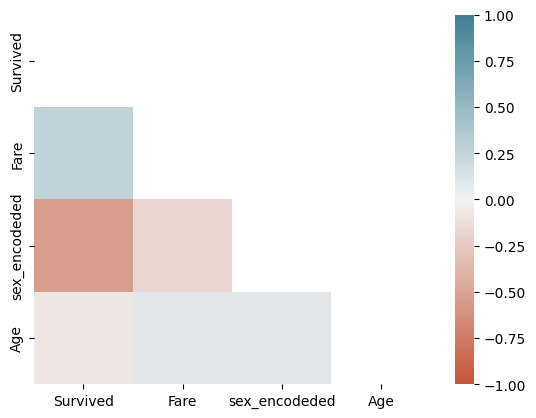

In [56]:
# Can we visualise this better?

corrmat = df[['Survived','Fare','sex_encodeded','Age']].corr()
mask= np.zeros_like(corrmat)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrmat,
            vmax=1, vmin=-1,
            annot=True, annot_kws={'fontsize':50},
            mask=mask,
            cmap=sns.diverging_palette(20,220,as_cmap=True))

In [89]:
# What is the average Sex, Fare and Age of a survivor vs a non survivor ?

survived = df.loc[df['Survived'] == 1]
did_not_survive =  df.loc[df['Survived'] == 0]            

means = pd.DataFrame(columns=['Age','Sex','Fare'])

means.loc[0] = [df['Age'].mean(),df['sex_encodeded'].mean(),df['Fare'].mean()]
means.loc[1] = [survived['Age'].mean(),survived['sex_encodeded'].mean(),survived['Fare'].mean()]
means.loc[2] = [did_not_survive['Age'].mean(),did_not_survive['sex_encodeded'].mean(),did_not_survive['Fare'].mean()]

means

Age       Sex       Fare
0  29.642093  0.636236  34.567251
1  28.193299  0.322917  51.647672
2  30.626179  0.849057  22.965456

In [59]:
# What is the Standard Deviation of Sex, Fare and Age of a survivor vs a non survivor ?

std = pd.DataFrame(columns=['Age','Sex','Fare'])

std.loc[0] = [df['Age'].std(),df['sex_encodeded'].std(),df['Fare'].std()]
std.loc[1] = [survived['Age'].std(),survived['sex_encodeded'].std(),survived['Fare'].std()]
std.loc[2] = [did_not_survive['Age'].std(),did_not_survive['sex_encodeded'].std(),did_not_survive['Fare'].std()]

std

Age       Sex       Fare
0  14.492933  0.481420  52.938648
1  14.859146  0.468405  70.664499
2  14.172110  0.358417  31.448825

In [60]:
# Lets put the survival in terms of Standard deivaions. 

results =  pd.DataFrame(columns=['Age','Sex','Fare'])

results.loc[0] = means.loc[1] - means.loc[2]

results.loc[1] = results.loc[0]/ std.loc[0]

results

Age       Sex       Fare
0 -2.432881 -0.526140  28.682216
1 -0.167867 -1.092892   0.541801

## Quesiton 2 )  Who was more likely die, a rich man or poor woman?

We will Can "rich" as a fare higher than the median fare. The mean is likely to be distored by uneven distribution of class/ We can also use the Pclass as to back up "rich" and sanity check it. 


In [64]:
# What was the median fare?

median_fare = df[['Fare']].median()
median_fare

Fare    15.64585
dtype: float64

£15.64585 would put most 2nd class passengers into the "rich" catagory, based on reading the 2nd class passengers where not what I would consider "rich" so we will use Pclass instead.

In [75]:
rich_men = df[(df["Sex"] == "male") & (df["Pclass"] == 1) & (df["Age"] > 18) ]

rich_men["Survived"].mean()

0.375

In [76]:
poor_women = df[(df["Sex"] == "female") & (df["Pclass"] != 1)& (df["Age"] > 18) ]

poor_women["Survived"].mean()

0.6638655462184874

In [77]:
very_poor_women = df[(df["Sex"] == "female") & (df["Pclass"] == 3)& (df["Age"] > 18) ]

very_poor_women["Survived"].mean()

0.423728813559322

## Quesiton 3) Did your nationality impact your chance to survive? 


C = Cherbourg, Q = Queenstown (today Cobh), S = Southampton

In [90]:
df.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.607692
Q    0.285714
S    0.362816
Name: Survived, dtype: float64

In [91]:
df.groupby(['Embarked'])['Fare'].mean()

Embarked
C    68.296767
Q    18.265775
S    27.476284
Name: Fare, dtype: float64

In [93]:
rich_women = df[(df["Sex"] == "female") & (df["Pclass"] == 1) & (df["Age"] > 18) ]
rich_women.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.970588
Q    1.000000
S    0.972973
Name: Survived, dtype: float64

In [96]:
very_poor_boys= df[(df["Sex"] == "male") & (df["Pclass"] == 3)& (df["Age"] < 18) ]
very_poor_boys.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.400000
Q    0.000000
S    0.235294
Name: Survived, dtype: float64